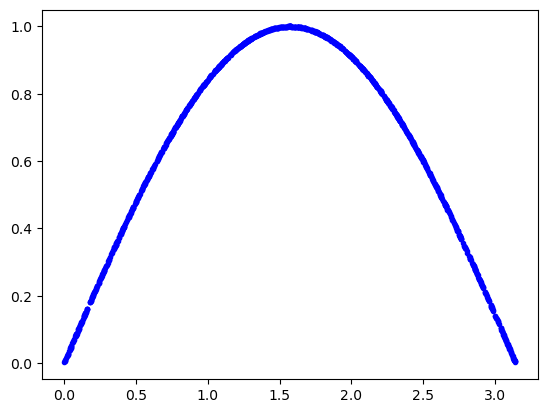

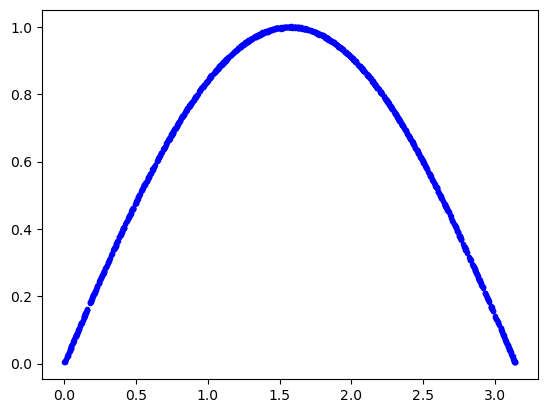

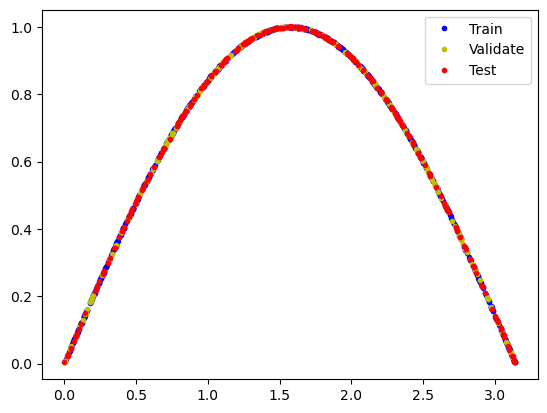

d:\opt\WingetApps_Ddrive\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [1]:
# TensorFlow is an open source machine learning library
import tensorflow as tf
# NumPy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

# We'll use Keras to create a simple model architecture
# Note: Changed tf.keras below to tensorflow.keras (code from the book)
from tensorflow.keras import layers

# Define the number of nodes in each layer of the network
# Layer1 with 24 and Layer2 with 16 nodes is better than 16 and 24 respectively.
DENSE1_SIZE = 16  #5 --> 8 --> 16
DENSE2_SIZE = 16  #2 --> 8 --> 16
NUM_OF_EPOCHS = 100 #change 1500 to 900, since after 800 no change in the loss
BATCH_SIZE = 16

# We'll generate this many sample datapoints
SAMPLES = 1200
# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)
# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
# You can generate only a half of the sine wave by changing high from 2pi to pi
x_values = np.random.uniform(low=0, high=math.pi, size=SAMPLES)
# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)
# Calculate the corresponding sine values
y_values = np.sin(x_values)
# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

# Add a small random number to each y value
# When the number of Layer 1 and 2 nodes are increased, the noise level
# from 0.001 to some higher value (0.01, etc) still impacts less the quality
# of predictions.
y_values += 0.001 * np.random.randn(*y_values.shape)
# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)
# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])
# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

# Activation function used here is relu (Rectified Linear Unit)
def relu(input):
    return max(0.0, input)

model_2 = tf.keras.Sequential()
# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(DENSE1_SIZE, activation='relu', input_shape=(1,)))
# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(DENSE2_SIZE, activation='relu'))
# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))
# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Show a summary of the model
model_2.summary()



In [2]:
# 0. Did not get the same accurate predection as shown in the book epochs=600
# 1. So, increased the epochs from 600 to 1000 to see if there is any improvement
# Saw a great improvment on the negative cycle, which was closer to actual
# 2. Increased the epochs still further from 1000 to 1200 to see if it improves further
# 3. Still some error near negative peak, so changed it from 1200 to 1500
# 4. So far, the batch size was kept at 16. Now epochs=1500 and batch_size=32 tried out
# The previous run +v peak also got affected a bit, but -ve peak became better
# 5. Change now epochs=1500 and batch_size=64, it became worse.
# 6. Went back to epochs=1500 and batch_size=16
# 7. Error does not improve beyond Epoch=1000, so reduced it from 1500 to 1000
history_2 = model_2.fit(x_train, y_train, epochs=NUM_OF_EPOCHS, batch_size=BATCH_SIZE,
validation_data=(x_validate, y_validate))


Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.2289 - mae: 0.4125 - val_loss: 0.1405 - val_mae: 0.3185
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1313 - mae: 0.3032 - val_loss: 0.1080 - val_mae: 0.2789
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1023 - mae: 0.2680 - val_loss: 0.0849 - val_mae: 0.2461
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0825 - mae: 0.2421 - val_loss: 0.0678 - val_mae: 0.2178
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0674 - mae: 0.2174 - val_loss: 0.0541 - val_mae: 0.1914
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0548 - mae: 0.1942 - val_loss: 0.0426 - val_mae: 0.1678
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0442 - mae: 0.1727 - val_loss: 0.0329 - val_mae: 0.1449
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0349 - mae: 0.1519 - val_loss: 0.0247 - val_mae: 0.1224
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.02

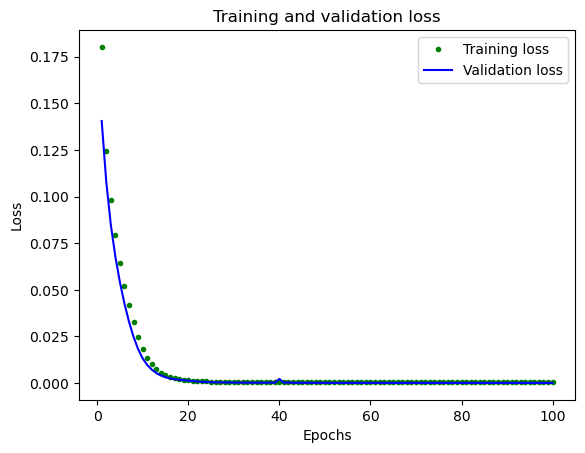

In [3]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


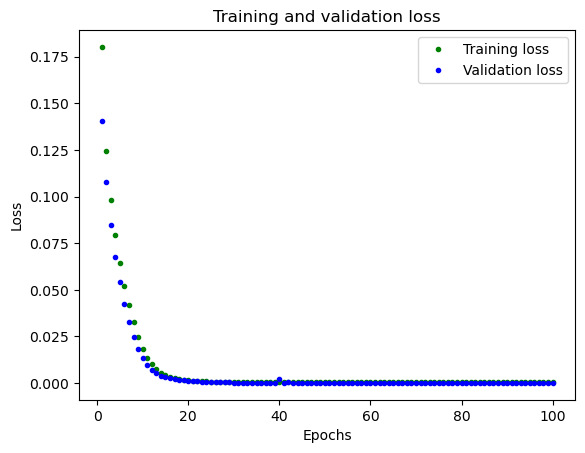

In [4]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 0 #100
plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

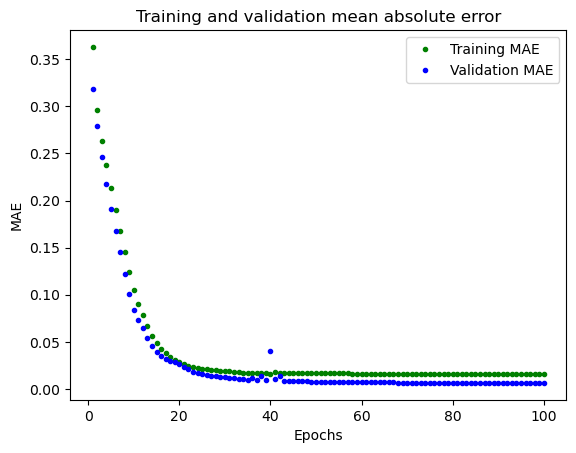

In [5]:
#Finally, we plot the mean absolute error for the same set of epochs:
plt.clf()
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.4094e-05 - mae: 0.0070  
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


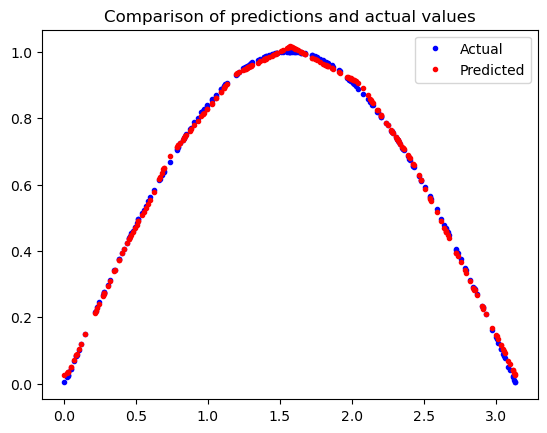

In [6]:
#This cell will evaluate our model against our test data:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)
# Make predictions based on our test dataset
predictions = model_2.predict(x_test)
# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()


In [7]:
# The below extraction code is from the ref:
# Ref: https://github.com/keras-team/keras/issues/91
# Get the weights and biases of each layer from the model
# print out the weight coefficients of first layer

# To use this code below from other file, the following assignment done
model = model_2

kernel_1, bias_1 = model.layers[0].get_weights()
print('\nkernel_1:\n')
print(kernel_1)

#*********
lenK1 = len(kernel_1[0])
print('\n kernel_1[0] size:\n', lenK1)

for i in range(lenK1-1):
    print(' ',  kernel_1[0][i], 'f,', sep='', end='')

print(' ', kernel_1[0][lenK1-1], 'f\n', sep='')
#*********

print('\nbias_1:\n')
print(bias_1)
print()

#*********
lenB1 = len(bias_1)
print('\n bias_1[0] size:\n', lenB1)

for i in range(lenB1-1):
    print(' ',  bias_1[i], 'f,', sep='', end='')

print(' ', bias_1[lenB1-1], 'f\n', sep='')
#*********

# print out the weight coefficients of second layer before output node
kernel_2, bias_2 = model.layers[1].get_weights()
print('\nkernel_2:\n')
print(kernel_2)

#*********
lenK2a = len(kernel_2) # list of lists
lenK2b = len(kernel_2[0])

print('\n lenK2a and lenK2b:\n', lenK2a, lenK2b)

for i in range(len(kernel_2)-1):
    listObj = kernel_2[i]
    for j in range(len(listObj)):    
        print(' ',  listObj[j], 'f,', sep='', end='')

for i in range(len(kernel_2[lenK2a-1])-1):
    print(' ',  kernel_2[lenK2a-1][i], 'f,', sep='', end='')

print(' ', kernel_2[lenK2a-1][lenK2b-1], 'f\n', sep='')

#*********

print('\nbias:_2\n')
print(bias_2)
print()

#*********
lenB2 = len(bias_2)
print('\n bias_2[0] size:\n', lenB2)

for i in range(lenB2-1):
    print(' ',  bias_2[i], 'f,', sep='', end='')

print(' ', bias_2[lenB2-1], 'f\n', sep='')
#*********

# print out the weight coefficients of third output layer
kernel_3, bias_3 = model.layers[2].get_weights()
print('\nkernel_3:\n')
print(kernel_3)

#*********
lenK3a = len(kernel_3)
lenK3b = len(kernel_3[0])

print('\n lenK4a\n', lenK3a)

for i in range(len(kernel_3)-1):
    listObj = kernel_3[i]
    for i in range(len(listObj)):    
        print(' ',  listObj[i], 'f,', sep='', end='')

print(' ', kernel_3[lenK3a-1][lenK3b-1], 'f\n', sep='')

#*********

print('\nbias:_3\n')
print(bias_3)
print()

#*********
lenB3 = len(bias_3)
print('\n bias_3[0] size:\n', lenB3)

for i in range(lenB3-1):
    print(' ',  bias_3[i], 'f,', sep='', end='')

print(' ', bias_3[lenB3-1], 'f\n', sep='')
#*********



kernel_1:

[[ 0.62610614  0.5508767   0.47803077  0.36229438 -0.3693452   0.22541068
  -0.5184041  -0.17942512 -0.3539167   0.29719922 -0.5349663   0.18085182
  -0.37303975 -0.17738718 -0.09160256  0.33448884]]

 kernel_1[0] size:
 16
 0.62610614f, 0.5508767f, 0.47803077f, 0.36229438f, -0.3693452f, 0.22541068f, -0.5184041f, -0.17942512f, -0.3539167f, 0.29719922f, -0.5349663f, 0.18085182f, -0.37303975f, -0.17738718f, -0.091602564f, 0.33448884f


bias_1:

[-0.38226405 -0.0114503  -0.01893263  0.06820201  0.          0.30599308
  0.          0.          0.         -0.35177472  0.          0.42162666
  0.          0.          0.          0.33936694]


 bias_1[0] size:
 16
 -0.38226405f, -0.011450297f, -0.018932626f, 0.06820201f, 0.0f, 0.30599308f, 0.0f, 0.0f, 0.0f, -0.35177472f, 0.0f, 0.42162666f, 0.0f, 0.0f, 0.0f, 0.33936694f


kernel_2:

[[-8.52146149e-02  3.97525340e-01  1.49875924e-01 -3.19027901e-02
  -4.23524499e-01  7.62770995e-02 -4.31426436e-01 -5.35082161e-01
  -1.35736555e-01 -

In [8]:
# Function to convert some hex values into an array for C programming
import time, sys

def hex_to_c_array(model, file_name):
    c_str = ""

    # Create header guard
    c_str += '#ifndef ' + file_name.upper() + '_H\n'
    c_str += "#define " + file_name.upper() + '_H\n\n'

    c_str += "/*\n Author: Mouli Sankaran \n"
    c_str += " CAUTION: This is an auto generated file.\n DO NOT EDIT OR MAKE ANY CHANGES TO IT.\n"

# Time stamping of this model data in the generated file
    localtime = time.asctime( time.localtime(time.time()) )
    c_str += " This model data was generated on " + localtime+ '\n\n'
    print("This model data was generated on:", localtime)

# Add information about the verisons of tools and packages used in generating this header file
    c_str += " Tools used:\n Python:" + str(sys.version) + "\n Numpy:" + str(np.version.version) + \
          "\n TensorFlow:" + str(sys.version) + "\n Keras: "+ str(tf.keras.__version__) + "\n\n"
    print("Tools used: Python:", sys.version, "\n Numpy:", np.version.version, \
          "\n TensorFlow:", sys.version, "\n Keras: ", tf.keras.__version__, "\n\n")

# Training details of the model
    c_str += ' Model details are:\n'
    c_str += ' NUM_OF_EPOCHS = ' + str(NUM_OF_EPOCHS) + '\n'
    c_str += ' BATCH_SIZE    = ' + str(BATCH_SIZE) + '\n*/\n\n'
    
# Generate 'C' constants for the no. of nodes in each layer
    c_str += '\nconst int ' + 'DENSE1_SIZE' + ' = ' + str(DENSE1_SIZE) + ';\n'
    c_str +=   'const int ' + 'DENSE2_SIZE' + ' = ' + str(DENSE2_SIZE) + ';\n\n'    
    
# Declare C variables
#****
    kernel_1, bias_1 = model.layers[0].get_weights()
    lenK1 = len(kernel_1[0])
    print('\n kernel_1[0] size:\n', lenK1)
    
    c_str += 'float ' + 'W1_data' + '[] = {\n   '  
    for i in range(lenK1-1):
      c_str += "%s%f%s" % (' ', kernel_1[0][i], 'f,')
      print(' ',  kernel_1[0][i], 'f,', sep='', end='')

    c_str += "%s%f%s" % (' ', kernel_1[0][lenK1-1], 'f\n};\n\n')
    print(' ', kernel_1[0][lenK1-1], 'f\n', sep='')
#****

#****
    lenB1 = len(bias_1)
    print('\n lenB1:\n', lenB1)
    
    c_str += 'float ' + 'b1_data' + '[] = {\n   '    
    for i in range(lenB1-1):
      c_str += "%s%f%s" % (' ', bias_1[i], 'f,')
      print(' ',  bias_1[i], 'f,', sep='', end='')

    c_str += "%s%f%s" % (' ', bias_1[lenB1-1], 'f\n};\n\n')
    print(' ', bias_1[lenB1-1], 'f\n', sep='')
#****

#****
# print out the weight coefficients of second layer before output node
    kernel_2, bias_2 = model.layers[1].get_weights()
    lenK2a = len(kernel_2) # list of lists
    lenK2b = len(kernel_2[0])
    print('\n lenK2a:\n', lenK2a)
    print('\n lenK2b:\n', lenK2b)

    c_str += 'float ' + 'W2_data' + '[] = {\n   '

    for i in range(lenK2a-1):
        listObj = kernel_2[i]
        for j in range(len(listObj)):
            c_str += "%s%f%s" % (' ', listObj[j], 'f,')
            print(' ',  listObj[j], 'f,', sep='', end='')    

    for i in range(len(kernel_2[lenK2a-1])-1):
        c_str += "%s%f%s" % (' ', kernel_2[lenK2a-1][i], 'f,')            
        print(' ',  kernel_2[lenK2a-1][i], 'f,', sep='', end='')

    c_str += "%s%f%s" % (' ', kernel_2[lenK2a-1][lenK2b-1], 'f\n};\n\n')
    print(' ', kernel_2[lenK2a-1][lenK2b-1], 'f\n', sep='')     
#****

#****
    lenB2 = len(bias_2)
    print('\n lenB2:\n', lenB2)
    
    c_str += 'float ' + 'b2_data' + '[] = {\n   '    
    for i in range(lenB2-1):
      c_str += "%s%f%s" % (' ', bias_2[i], 'f,')
      print(' ',  bias_2[i], 'f,', sep='', end='')

    c_str += "%s%f%s" % (' ', bias_2[lenB2-1], 'f\n};\n\n')
    print(' ', bias_2[lenB2-1], 'f\n', sep='')
#****

#***
# print out the weight coefficients of third output layer
    kernel_3, bias_3 = model.layers[2].get_weights()

#*********
    lenK3a = len(kernel_3)
    lenK3b = len(kernel_3[0])
    print('\n lenK3a:\n', lenK3a)
    print('\n lenK3b:\n', lenK3b)
    
    c_str += 'float ' + 'W3_data' + '[] = {\n   '    
    for i in range(lenK3a-1):
        listObj = kernel_3[i]
        for i in range(len(listObj)):
            c_str += "%s%f%s" % (' ', listObj[i], 'f,')           
            print(' ',  listObj[i], 'f,', sep='', end='')

    c_str += "%s%f%s" % (' ', kernel_3[lenK3a-1][lenK3b-1], 'f\n};\n\n')
    print(' ', kernel_3[lenK3a-1][lenK3b-1], 'f\n', sep='')

#****
#****
    lenB3 = len(bias_3)
    print('\n lenB3:\n', lenB3)
    
    c_str += 'float ' + 'b3_data' + '[] = {\n   '    
    for i in range(lenB3-1):
      c_str += "%s%f%s" % (' ', bias_3[i], 'f,')
      print(' ',  bias_3[i], 'f,', sep='', end='')

    c_str += "%s%f%s" % (' ', bias_3[lenB3-1], 'f\n};\n\n')
    print(' ', bias_3[lenB3-1], 'f\n', sep='')
#****

# Close out header guard
    c_str += '#endif //' + file_name.upper() + '_H'
  
    return c_str

In [9]:
# Write TFLite model to a C source (or header) file
with open("half_sine_2L_model_data" + '.h', 'w') as file:
    file.write(hex_to_c_array(model_2, "half_sine_2L_model_data"))

This model data was generated on: Wed Sep 11 12:38:20 2024
Tools used: Python: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)] 
 Numpy: 1.24.3 
 TensorFlow: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)] 
 Keras:  3.5.0 



 kernel_1[0] size:
 16
 0.62610614f, 0.5508767f, 0.47803077f, 0.36229438f, -0.3693452f, 0.22541068f, -0.5184041f, -0.17942512f, -0.3539167f, 0.29719922f, -0.5349663f, 0.18085182f, -0.37303975f, -0.17738718f, -0.091602564f, 0.33448884f


 lenB1:
 16
 -0.38226405f, -0.011450297f, -0.018932626f, 0.06820201f, 0.0f, 0.30599308f, 0.0f, 0.0f, 0.0f, -0.35177472f, 0.0f, 0.42162666f, 0.0f, 0.0f, 0.0f, 0.33936694f


 lenK2a:
 16

 lenK2b:
 16
 -0.085214615f, 0.39752534f, 0.14987592f, -0.03190279f, -0.4235245f, 0.0762771f, -0.43142644f, -0.53508216f, -0.13573655f, -0.58012694f, -0.34470865f, 0.013006151f, 0.48271284f, 0.4469674f, 0.50648445f, 0.43254155f, -0.3033263f, -0.22940795f, 